In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

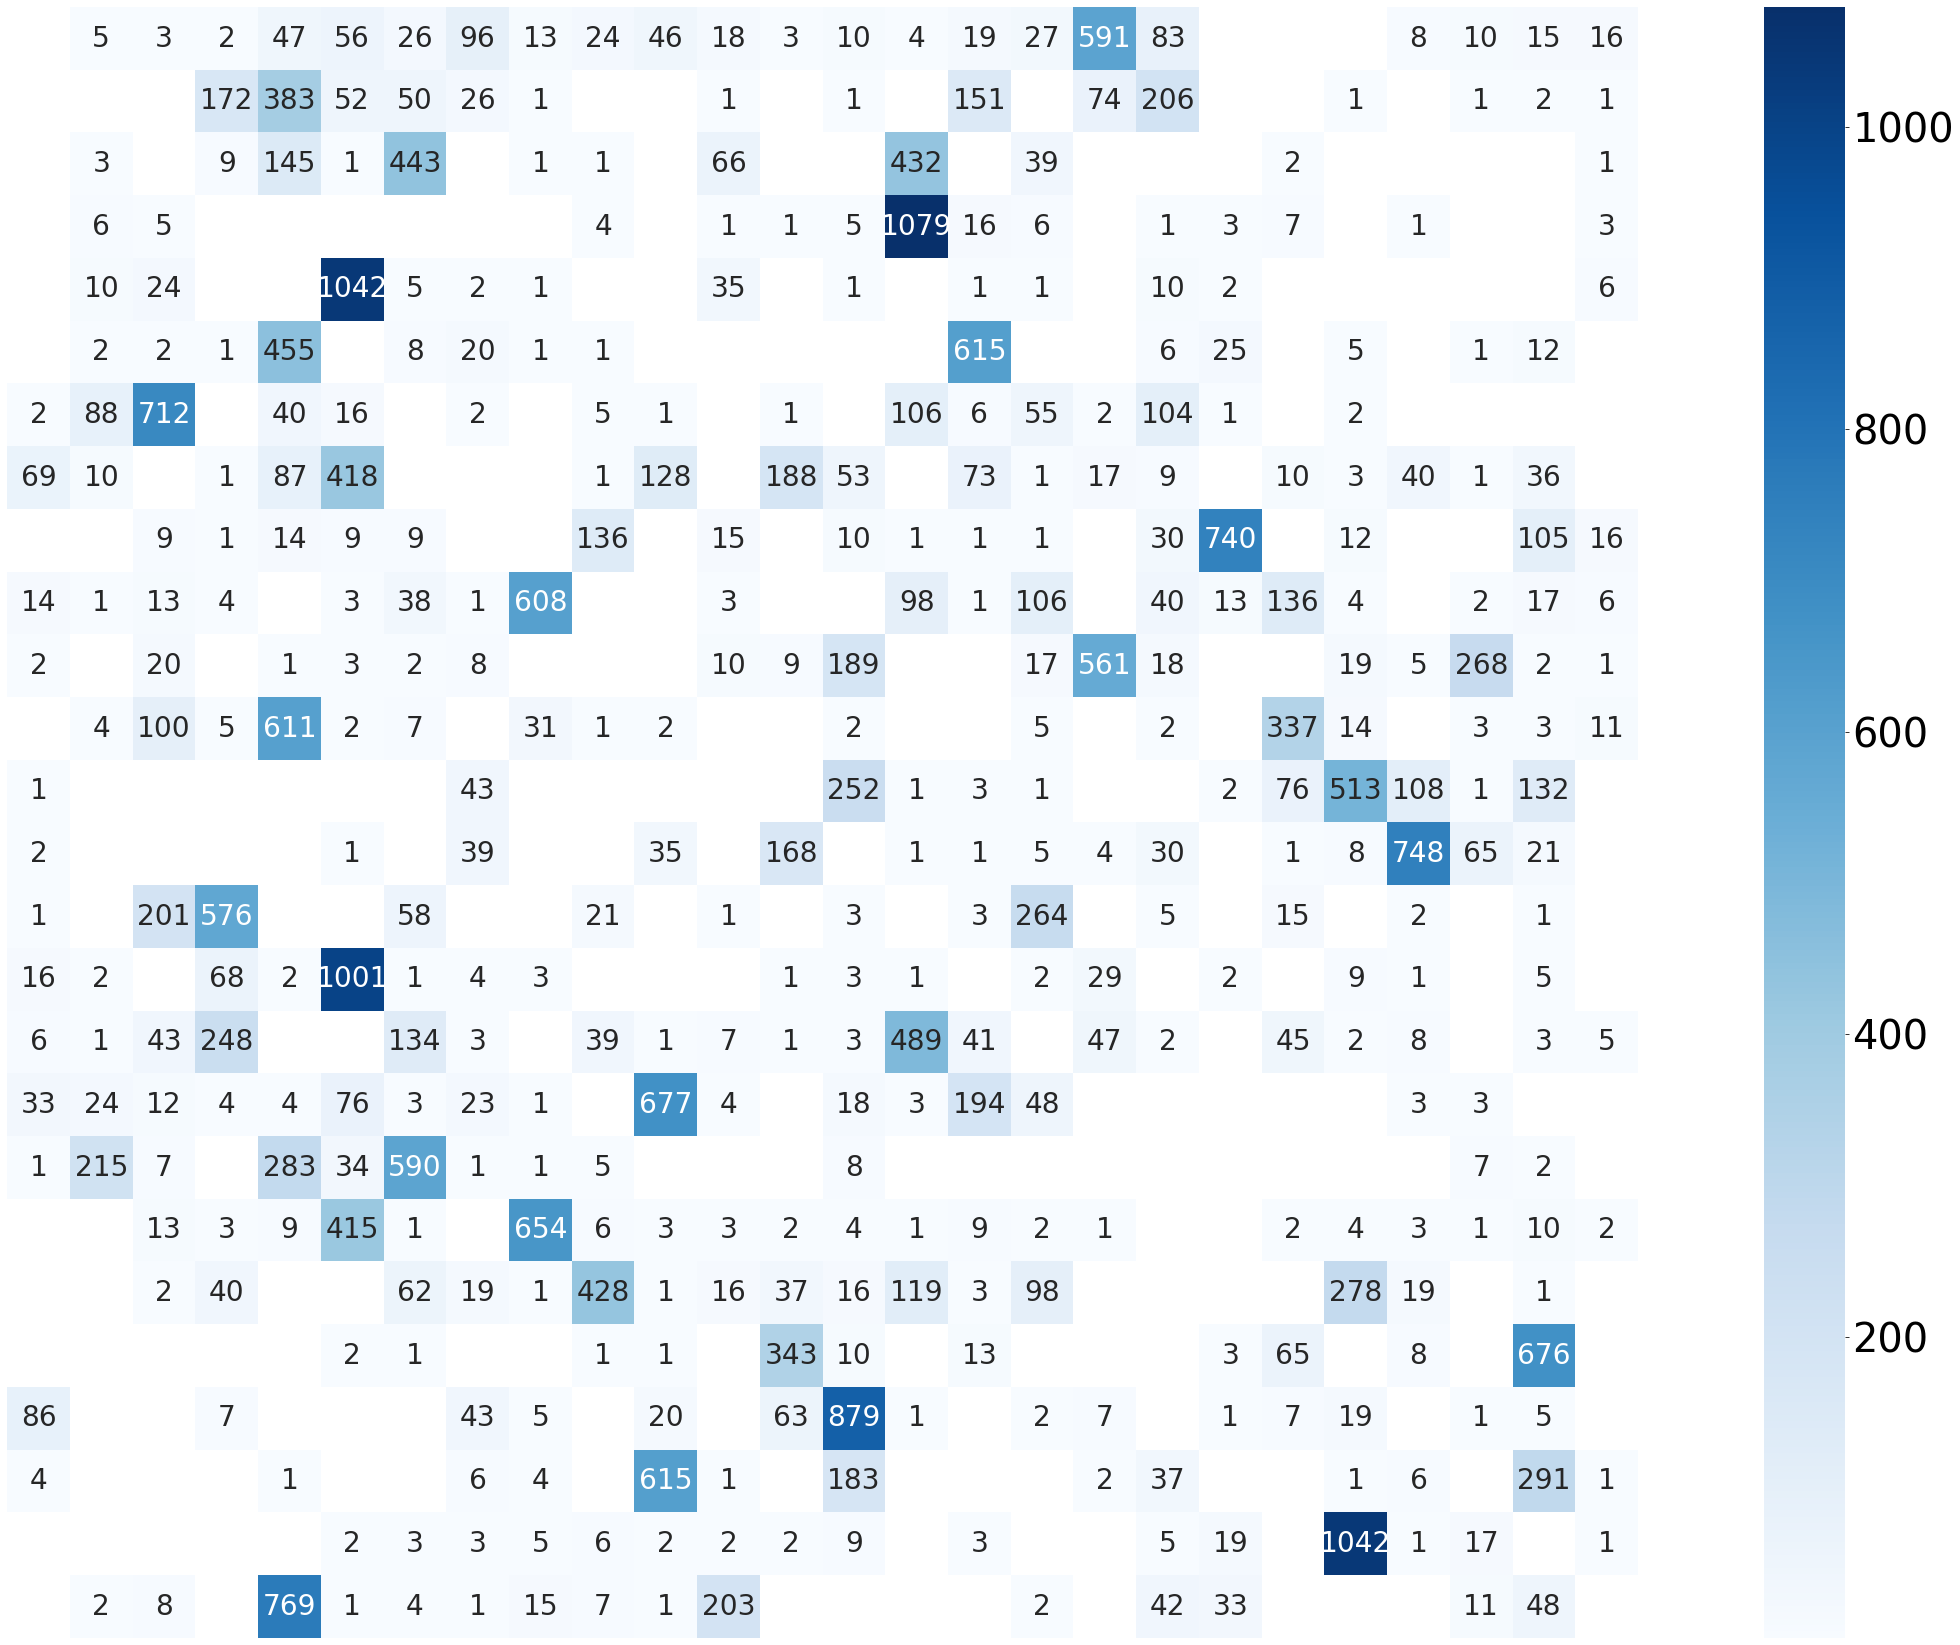

In [5]:
plt.rcParams["font.size"] = 40
dirname_adv = "../normalPGD_googlefonts/adv/"
# dirname_adv = "../GAN+classifier_c1e-6/adv/"
all = []
for org in range(26):
    alphabet_list = []
    for adv in range(26):
        alphabet_list.append(sum(os.path.isfile(os.path.join(dirname_adv + chr(org + 65) + "/" + chr(org + 65) + "→" + chr(adv + 65), name)) for name in os.listdir(dirname_adv + chr(org + 65) + "/" + chr(org + 65) + "→" + chr(adv + 65))))
    all.append(alphabet_list)
all = pd.DataFrame(all)
df_mask = (all == 0)
fig = plt.figure(figsize=(45, 30))
sns.heatmap(all, square=True, annot=True, fmt="d", annot_kws={"fontsize":28}, cmap="Blues", mask=df_mask)
# sns.heatmap(all, square=True, cmap="Blues", mask=df_mask)
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(bottom=False, left=False, right=False, top=False)
plt.savefig("../normalPGD_googlefonts/26*26_misrecognized.svg", facecolor="white", bbox_inches='tight', pad_inches=0)
# pp = PdfPages('../normalPGD_googlefonts/26*26_misrecognized.pdf')

# # save figure
# pp.savefig(fig, bbox_inches='tight', pad_inches=0)

# # close file
# pp.close()

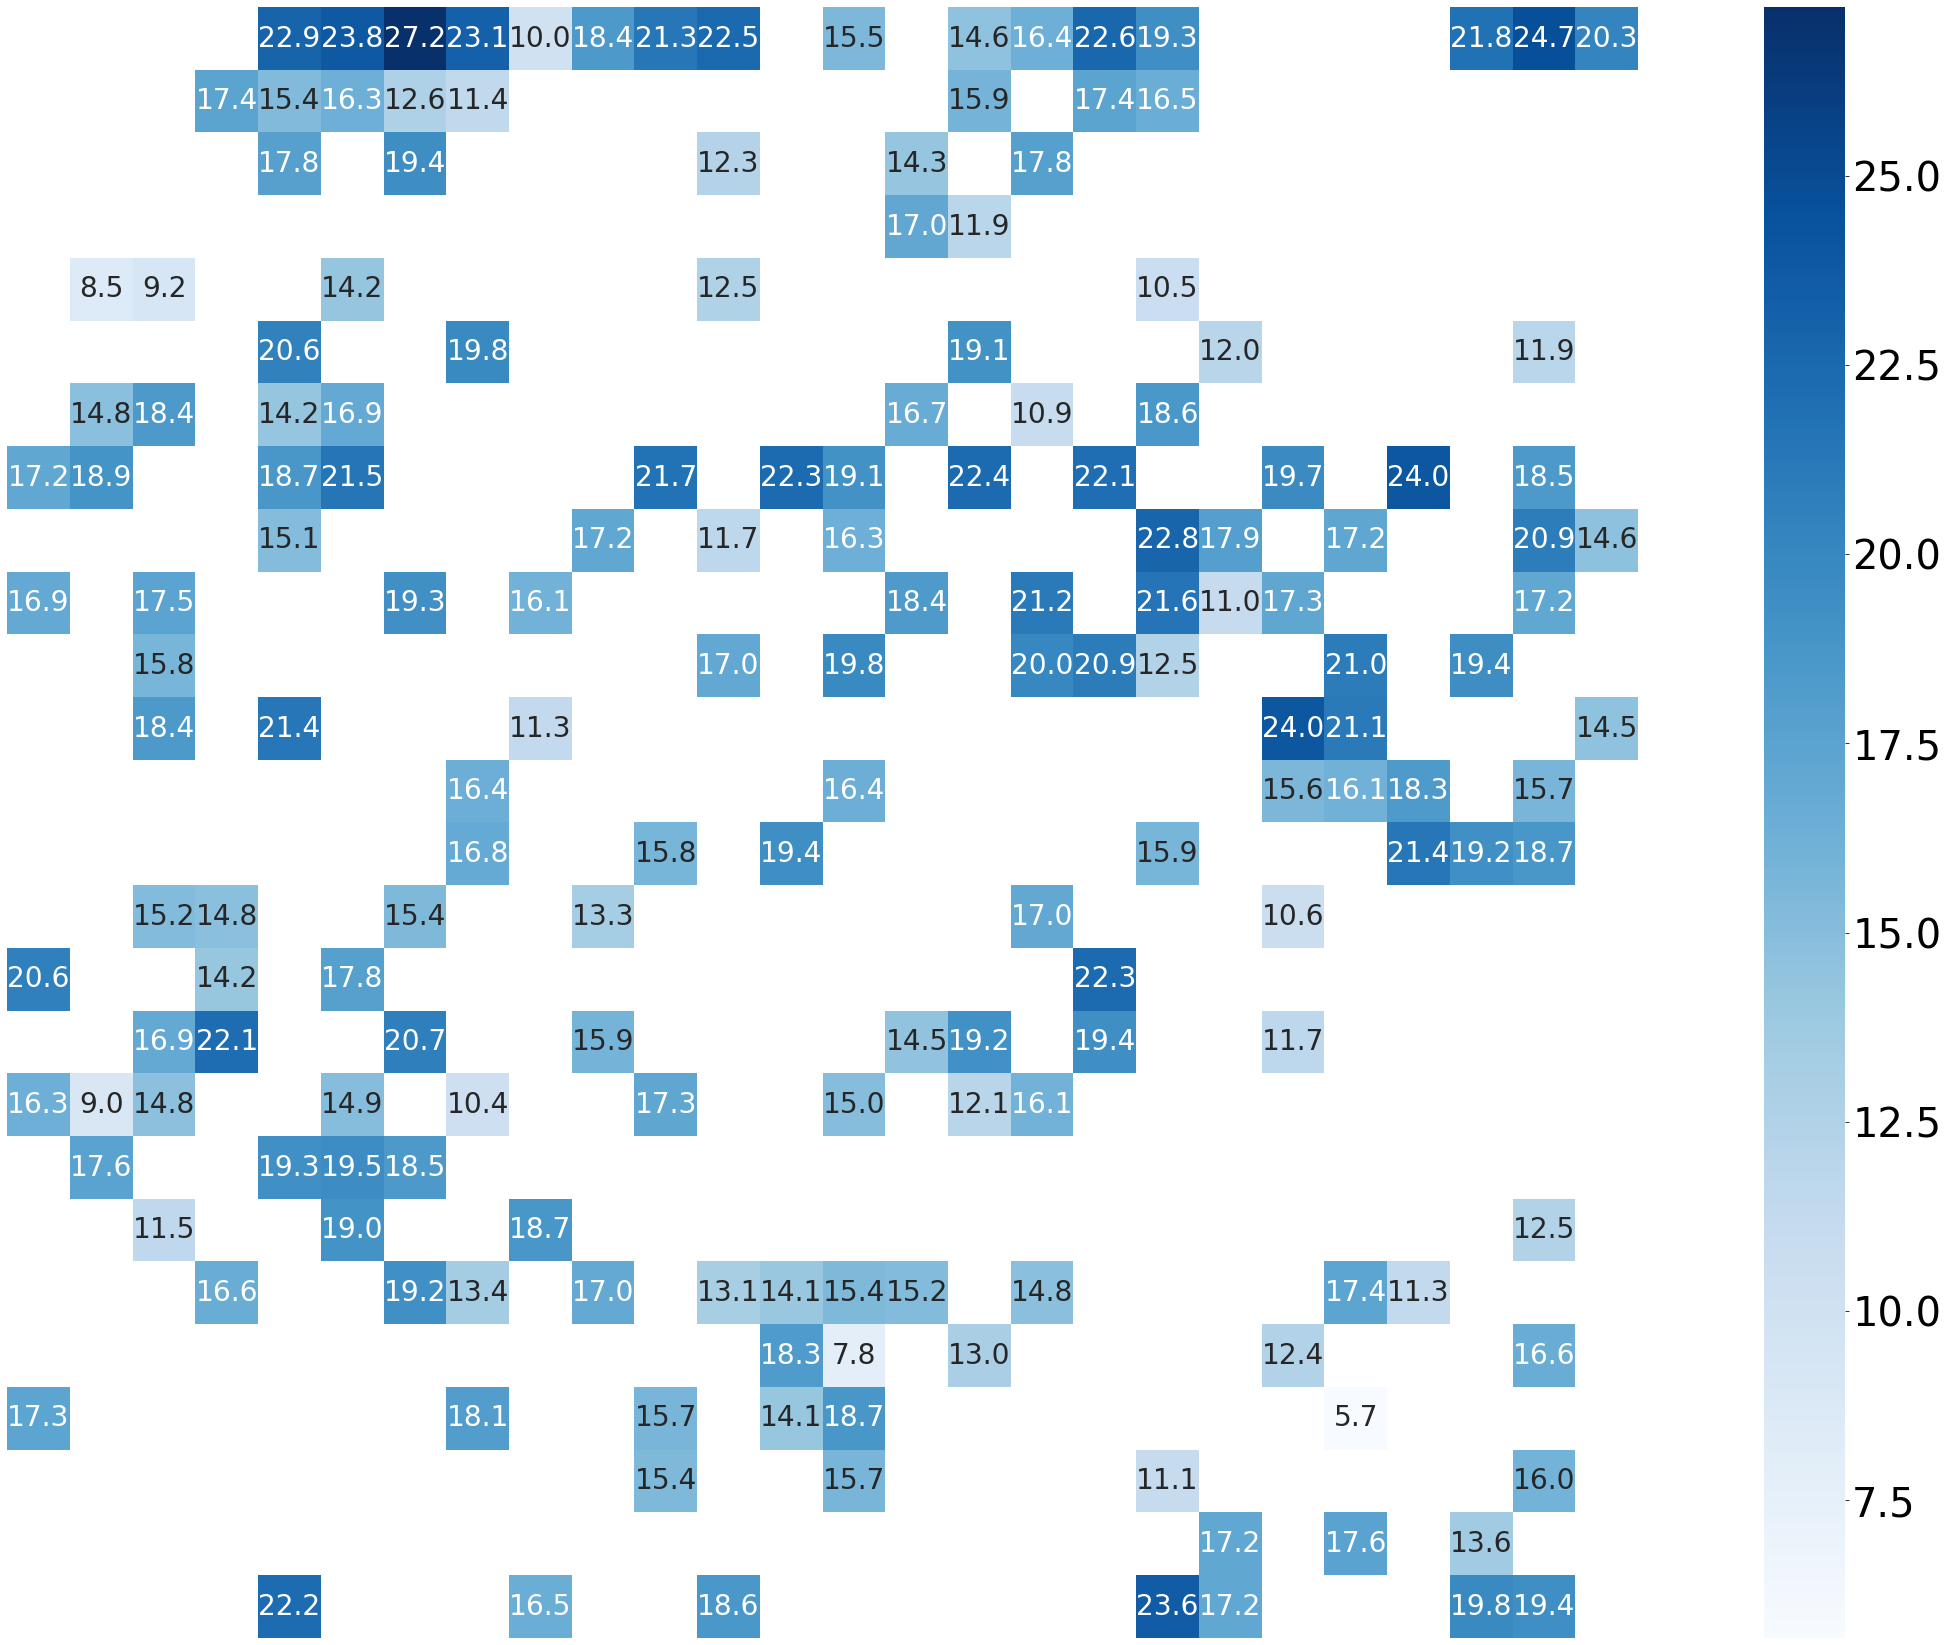

In [6]:
# dirname_adv = "../normalPGD_googlefonts/adv/"
dirname_pro = "../normalPGD_googlefonts/progress/"
# dirname_pro = "../GAN+classifier_c1e-6/progress/"
all = []
for org in range(26):
    alphabet_list = []
    for adv in range(26):
        mean = []
        if sum(os.path.isfile(os.path.join(dirname_adv + chr(org + 65) + "/" + chr(org + 65) + "→" + chr(adv + 65), name)) for name in os.listdir(dirname_adv + chr(org + 65) + "/" + chr(org + 65) + "→" + chr(adv + 65))) < 10:
            alphabet_list.append(0)
        else:
            for img in os.listdir(dirname_adv + chr(org + 65) + "/" + chr(org + 65) + "→" + chr(adv + 65)):
                img = img.replace(".png", "")
                img = int(img)
                mean.append(sum(os.path.isfile(os.path.join(dirname_pro + chr(org + 65) + "/{}".format(img), name)) for name in os.listdir(dirname_pro + chr(org + 65) + "/{}".format(img))))
            alphabet_list.append(np.mean(mean))

    all.append(alphabet_list)
all = pd.DataFrame(all, index=[chr(i + 65) for i in range(26)], columns=[chr(i + 65) for i in range(26)])
df_mask = (all == 0)
fig = plt.figure(figsize=(45, 30))
sns.heatmap(all, square=True, annot=True, fmt="1.1f", annot_kws={"fontsize":28}, cmap="Blues", mask=df_mask)
# sns.heatmap(all, square=True, cmap="Blues", mask=df_mask)
plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(bottom=False, left=False, right=False, top=False)
plt.savefig("../normalPGD_googlefonts/26*26_average_defensibility.svg", facecolor="white", bbox_inches='tight', pad_inches=0)
# pp = PdfPages('../normalPGD_googlefonts/26*26_average_defensibility.pdf')

# # save figure
# pp.savefig(fig, bbox_inches='tight', pad_inches=0)

# # close file
# pp.close()